In [6]:
# !pip install ultralytics
# !pip install pytube
# !pip uninstall pytube

In [7]:
# conda activate yolo

In [1]:
import ultralytics
from ultralytics import YOLO
import cv2
from IPython.display import clear_output
import matplotlib.pyplot as plt
import torch
import os
print(torch.cuda.is_available())


True


In [2]:
model = YOLO('yolov8n.pt')

In [6]:
model = YOLO('best (1).pt')

In [4]:


def get_bboxs(pred):
    boxes = pred.boxes
    xyxy = boxes.xyxy
    conf = boxes.conf 
    clss = boxes.cls                                     
    return xyxy, conf, clss

def draw(img, xyxy, conf, clss):
    for i in range(len(xyxy)):                                  
        pt1 = int(xyxy[i][0]), int(xyxy[i][1])
        pt2 = int(xyxy[i][2]), int(xyxy[i][3])
        text = f'{conf[i]:.2f} {model.names[clss[i].item()]}' 
        fronScale=0.5
        img = cv2.rectangle(img, pt1, pt2, color=(255,0,0), thickness=2)
        img = cv2.putText(img,text, pt1, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0, 255),1)
    return img


def draw_all_objects(img, predictions):
    for pred in predictions:
        xyxy, conf, clss = get_bboxs(pred)
        for i in range(len(xyxy)):
            pt1 = int(xyxy[i][0]), int(xyxy[i][1])
            pt2 = int(xyxy[i][2]), int(xyxy[i][3])
            img = cv2.rectangle(img, pt1, pt2, color=(255, 0, 0), thickness=1)
            font = cv2.FONT_HERSHEY_SIMPLEX
            org = pt1
            fontScale = 0.5  # Điều chỉnh kích thước font
            color = (0, 125, 255)
            thickness = 2
            class_name = pred.names[int(clss[i])]
            confidence = conf[i]
            text = f'{class_name}: {confidence:.2f}'  # Sử dụng f-string để tạo chuỗi
            cv2.putText(img, text, org, font, fontScale, color, thickness, cv2.LINE_AA)
    return img




0: 448x640 1 car, 13 pedestrians, 1 people, 2 vans, 26.4ms
Speed: 6.0ms preprocess, 26.4ms inference, 3.0ms postprocess per image at shape (1, 3, 448, 640)


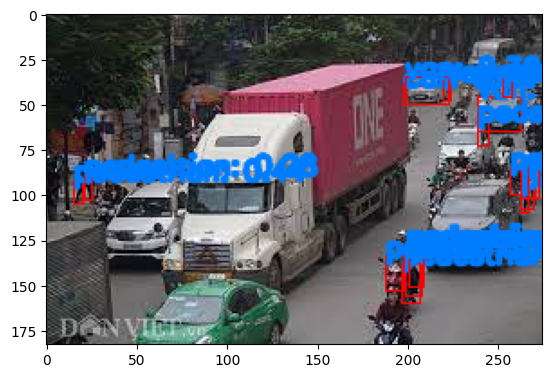

In [7]:
img = cv2.imread('anh_nhieu_xe.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
pred = model.predict(img)[0]
# print(pred)  
xyxy, conf, clss = get_bboxs(pred)
img = draw_all_objects(img,pred)
# clear_output()
plt.imshow(img)
plt.show()

In [ ]:
# Đường dẫn đến thư mục chứa tất cả các ảnh bạn muốn dự đoán
image_folder = "D://K17_FPT//DAP391m//yolov8//data_test"

# Đọc danh sách các tệp hình ảnh trong thư mục
image_files = [f for f in os.listdir(image_folder) if f.endswith('.jpg')]

# Lặp qua từng ảnh và thực hiện dự đoán
for image_file in image_files:
    image_path = os.path.join(image_folder, image_file)
    
    # Đọc ảnh và chuyển đổi sang định dạng RGB (nếu cần)
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Thực hiện dự đoán trên ảnh
    pred = model.predict(img)[0]
    
    # Lấy thông tin bbox
    xyxy, conf, clss = get_bboxs(pred)
    
    # Vẽ các đối tượng trên ảnh
    img = draw_all_objects(img, pred)
    
    # Hiển thị ảnh hoặc lưu lại (tuỳ chọn)
    plt.imshow(img)
    plt.show()


In [8]:
pred = model.predict(img)[0]
# boxes = pred.boxes
# a=xyxy[0]
# print(clss)
# print(pred.names[int(clss[0])])
# # print(boxes)
# print(pred.names)
# print(boxes.conf)
# print(xyxy)
# print(a[1])
print(model.predict(img))


0: 448x640 1 car, 1 train, 2 trucks, 1 traffic light, 27.4ms
Speed: 4.6ms preprocess, 27.4ms inference, 3.0ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 1 car, 1 train, 2 trucks, 1 traffic light, 27.9ms
Speed: 3.9ms preprocess, 27.9ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)


[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant'

In [7]:
# video = cv2.VideoCapture(0)

# while True:
#     ret, frame = video.read()
#     if not ret:
#         break
#     pred = model.predict(frame[:,:,::-1])[0]
#     xyxy, conf, clss = get_bboxs(pred)
#     for i in range(len(xyxy)):
#         frame = draw(frame, xyxy[i], conf[i], pred.names[int(clss[i])])
#     cv2.imshow('frame', frame)
#     clear_output(wait=True)
#     if cv2.waitKey(1)==27:
#         break
# cv2.destroyAllWindows()


0: 480x640 3 persons, 13.0ms
Speed: 4.0ms preprocess, 13.0ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)


conf: 0.8445088863372803, clss: person
conf: 0.7171247601509094, clss: person
conf: 0.5260735154151917, clss: person


In [36]:

#Set up video capture
cap = cv2.VideoCapture('video.mp4')
while True:
    ret, frame = cap.read()
    if not ret:
        break
    pred = model.predict(frame[:,:,::-1])[0]
    xyxy, conf, clss = get_bboxs(pred)
    for i in range(len(xyxy)):
        frame = draw(frame, xyxy[i], conf[i], pred.names[int(clss[i])])
    cv2.imshow('frame', frame)
    clear_output(wait=True)
    cv2.waitKey(1)
    
    # Thoát nếu bấm phím 'q'
    if cv2.waitKey(1) == 27:
        break
cv2.destroyAllWindows()

# cap = cv2.VideoCapture('video.mp4')
# while True:
#     ret, frame = cap.read()
#     if not ret:
#         break
#     pred = model.predict(frame[:,:,::-1])[0]
#     xyxy, conf, clss = get_bboxs(pred)
#     img = draw(frame, xyxy, conf, clss)
#     cv2.imshow('frame', img)
#     clear_output(wait=True)
#     cv2.waitKey(1)
    
#     # Thoát nếu bấm phím 'q'
#     if cv2.waitKey(1) == 27:
#         break
# cv2.destroyAllWindows()
    


0: 384x640 1 car, 1 truck, 12.0ms
Speed: 6.0ms preprocess, 12.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


conf: 0.40526875853538513, clss: car
conf: 0.285494863986969, clss: truck


In [ ]:
cap = cv2.VideoCapture('video.mp4')


In [5]:
# Định nghĩa ngưỡng tốc độ di chuyển để xác định tắc đường
threshold_speed = 5  # Đây chỉ là một ví dụ, bạn có thể điều chỉnh giá trị này

# Lưu trạng thái của các hộp giới hạn trước đó
prev_bboxs = []

while True:
    ret, frame = cap.read()
    if not ret:
        break
    pred = model.predict(frame[:,:,::-1])[0]
    xyxy, conf, clss = get_bboxs(pred)
    
    # Xác định tốc độ di chuyển của các hộp giới hạn
    speeds = []
    for i in range(len(xyxy)):
        bbox = xyxy[i]
        prev_bbox = prev_bboxs[i] if i < len(prev_bboxs) else None
        if prev_bbox:
            # Tính khoảng cách di chuyển giữa các hộp giới hạn liên tiếp
            speed = abs(bbox[0] - prev_bbox[0]) + abs(bbox[1] - prev_bbox[1])
            speeds.append(speed)
        else:
            speeds.append(0)
        
        prev_bboxs = xyxy.copy()
    
    # Xác định các hộp giới hạn tắc đường
    congested_boxes = [i for i, speed in enumerate(speeds) if speed > threshold_speed]
    
    # Hiển thị cảnh báo trên các hộp giới hạn tắc đường
    for i in congested_boxes:
        frame = draw(frame, xyxy[i], conf[i], pred.names[int(clss[i])])
        cv2.putText(frame, "Traffic Jam", (int(xyxy[i][0]), int(xyxy[i][1]) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
    
    cv2.imshow('frame', frame)
    clear_output(wait=True)
    
    # Thoát nếu bấm phím 'q'
    if cv2.waitKey(1) == 27:
        break

cv2.destroyAllWindows()


NameError: name 'cap' is not defined